In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt
%matplotlib inline

# Extract Image Embeddings

1/1 [==============================] - 6s 6s/step


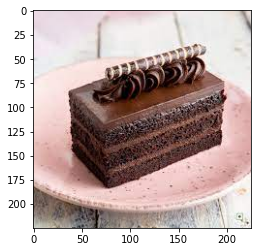

In [22]:
def extract_embedding(model,img_path):
    img=image.load_img(img_path,target_size=(224,224))
    img=image.img_to_array(img)
    img= np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    predicted=model.predict(img)
    predicted_df=pd.DataFrame(predicted[0]).T
    return(predicted_df)


model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
img_path = "E:/Dataset/Food/cake_2.jpg"
extract_embedding(model,img_path)

im = cv2.imread(img_path)
plt.imshow(im[:,:,::-1])
plt.show()


# Calculate Image Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

def get_similar_food(query_img_path):
    folder='E:/Dataset/Food/'
    img_dict=dict()
    for img in os.listdir(folder):
        if(folder+img!=query_img_path):
            query_embedding=extract_embedding(model,query_img_path)
            img_embedding=extract_embedding(model,folder+img)
            img_dict[folder+img]=cosine_similarity(query_embedding,img_embedding)
    sorted_values = sorted(img_dict.items(), key=lambda x:x[1],reverse=True)
    return(sorted_values)
    





1/1 [==============================] - 1s 906ms/step


[('E:/Dataset/Food/cake_5.jpg', array([[0.68402517]], dtype=float32)),
 ('E:/Dataset/Food/cake_4.jpg', array([[0.63084567]], dtype=float32)),
 ('E:/Dataset/Food/cake_!.jpg', array([[0.5614152]], dtype=float32)),
 ('E:/Dataset/Food/cake_3.jpg', array([[0.5167221]], dtype=float32)),
 ('E:/Dataset/Food/rice_3.jpg', array([[0.40032783]], dtype=float32)),
 ('E:/Dataset/Food/pizza_4.jpg', array([[0.38421005]], dtype=float32)),
 ('E:/Dataset/Food/pizza_1.jpg', array([[0.3704551]], dtype=float32)),
 ('E:/Dataset/Food/rice_2.jpg', array([[0.364963]], dtype=float32)),
 ('E:/Dataset/Food/pizza_2.jpg', array([[0.35486633]], dtype=float32)),
 ('E:/Dataset/Food/rice_1.jpg', array([[0.33753514]], dtype=float32)),
 ('E:/Dataset/Food/pizza_3.jpg', array([[0.31788516]], dtype=float32)),
 ('E:/Dataset/Food/rice_5.jpg', array([[0.30004728]], dtype=float32)),
 ('E:/Dataset/Food/rice_4.jpg', array([[0.29514313]], dtype=float32)),
 ('E:/Dataset/Food/pizza_5.jpg', array([[0.28125507]], dtype=float32))]

# Display recommended images

1/1 [==============================] - 1s 954ms/step
Recommended Images


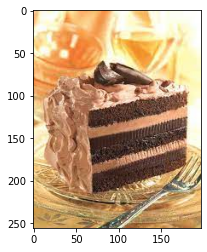

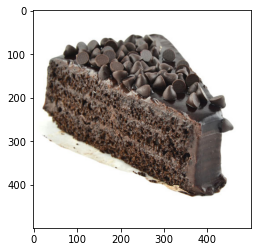

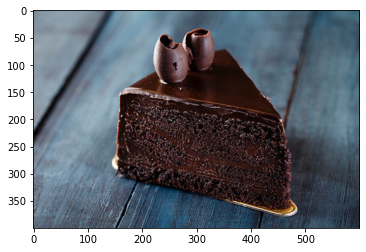

In [21]:
similar_items=get_similar_food(img_path)
print("Recommended Images")
for item in similar_items[:3]:
    im = cv2.imread(item[0])
    plt.imshow(im[:,:,::-1])
    plt.show()